<a href="https://colab.research.google.com/github/aryan2006-saini/Machine_learning_4thSem/blob/main/Iris_data_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color: red"><b>1. OBJECTIVE OF THE PRACTICAL</b></h1>
<hr>

<p>
The objective of this practical is to implement <b>Simple Linear Regression</b> using three different mathematical approaches:
</p>

<ul>
  <li><b>Matrix Multiplication Method (Normal Equation)</b></li>
  <li><b>Covariance / Variance Method</b></li>
  <li><b>Iterative Method (Gradient Descent)</b></li>
</ul>

<p>
We will use the <b>first 50 samples</b> of the Iris dataset to predict <b>Sepal Width (Y)</b> from <b>Sepal Length (X)</b> by determining:
</p>

<ul>
  <li><b>w</b> = weight (slope)</li>
  <li><b>b</b> = bias (intercept)</li>
</ul>

<p>
Additionally, we will compute and compare the following performance metrics:
</p>

<ul>
  <li><b>Mean Squared Error (MSE)</b></li>
  <li><b>Coefficient of Determination (R²)</b></li>
</ul>


<h1 style="color: red"><b>2. Codes</b></h1>

<h1><b>METHOD 1: MATRIX MULTIPLICATION METHOD</b></h1>
<hr>

<h3>✔ Formula</h3>

<p>
$$
\begin{bmatrix}
b \\
w
\end{bmatrix}
=
(X^T X)^{-1} X^T y
$$
</p>

<p><b>Where:</b></p>

<ul>
  <li><b>b</b> = bias (intercept)</li>
  <li><b>w</b> = weight (slope)</li>
</ul>


Intercept: -0.5694326730400199
Slope: 0.7985283006472
MSE: 0.06317349627147599
R2: 0.5513755803923135


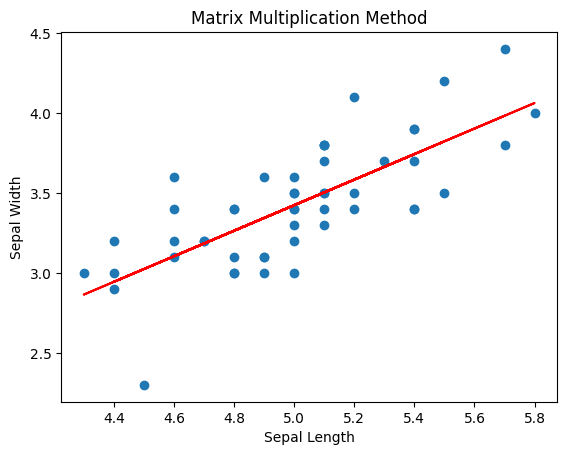

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load Iris dataset (first 50 samples)
iris = datasets.load_iris()
x = iris.data[:50, 0]
y = iris.data[:50, 1]

# Create matrix X (bias + x)
X = np.c_[np.ones(len(x)), x]
Y = y.reshape(-1, 1)

# Normal Equation
XT = X.T
XT_X = np.dot(XT, X)
XT_Y = np.dot(XT, Y)

w = np.dot(np.linalg.inv(XT_X), XT_Y)

intercept = w[0][0]
slope = w[1][0]

print("Intercept:", intercept)
print("Slope:", slope)

# Prediction
y_pred = np.dot(X, w)

# MSE
mse = np.mean((y - y_pred.reshape(-1))**2)
print("MSE:", mse)

# R²
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - y_pred.reshape(-1))**2)
r2 = 1 - (ss_residual / ss_total)
print("R2:", r2)

# Graph
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.title("Matrix Multiplication Method")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


<h1><b>METHOD 2: COVARIANCE / VARIANCE METHOD</b></h1>
<hr>

<h3>✔ Formula</h3>

<p><b>Slope:</b></p>

<p>
$$
w = \frac{Cov(X, Y)}{Var(X)}
$$
</p>

<p><b>Bias:</b></p>

<p>
$$
b = \bar{y} - w \bar{x}
$$
</p>

<p><b>Where:</b></p>

<p>
$$
Cov(X, Y) = \frac{1}{n} \sum (x_i - \bar{x})(y_i - \bar{y})
$$
</p>

<p>
$$
Var(X) = \frac{1}{n} \sum (x_i - \bar{x})^2
$$
</p>


Intercept: -0.5694326730396493
Slope: 0.7985283006471532
MSE: 0.06317349627147598
R2: 0.5513755803923136


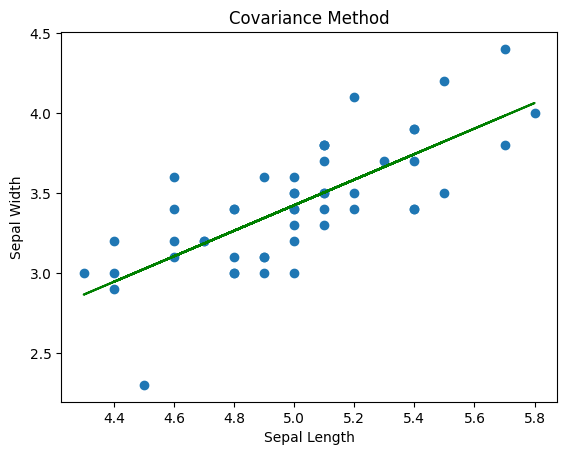

In [ ]:
iris = datasets.load_iris()
x = iris.data[:50, 0]
y = iris.data[:50, 1]

# Means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Covariance and variance
cov = np.mean((x - x_mean) * (y - y_mean))
var = np.mean((x - x_mean)**2)

# Parameters
slope = cov / var
intercept = y_mean - slope * x_mean

print("Intercept:", intercept)
print("Slope:", slope)

# Predictions
y_pred = intercept + slope * x

# MSE
mse = np.mean((y - y_pred)**2)
print("MSE:", mse)

# R²
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - y_pred)**2)
r2 = 1 - (ss_residual / ss_total)
print("R2:", r2)

# Graph
plt.scatter(x, y)
plt.plot(x, y_pred, 'g')
plt.title("Covariance Method")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


<h1><b>METHOD 3: ITERATIVE METHOD (GRADIENT DESCENT)</b></h1>
<hr>

<h3>✔ Formula</h3>

<p><b>Hypothesis Function:</b></p>

<p>
$$
h(x) = b + w x
$$
</p>

<p><b>Cost Function:</b></p>

<p>
$$
J = \frac{1}{2m} \sum_{i=1}^{m} (h(x_i) - y_i)^2
$$
</p>

<p><b>Update Rules:</b></p>

<p>
$$
b = b - \alpha \frac{1}{m} \sum (h(x_i) - y_i)
$$
</p>

<p>
$$
w = w - \alpha \frac{1}{m} \sum (h(x_i) - y_i)x_i
$$
</p>

<p><b>Where:</b></p>

<ul>
  <li><b>w</b> = weight (slope)</li>
  <li><b>b</b> = bias (intercept)</li>
  <li>\( \alpha \) = Learning Rate</li>
  <li>\( m \) = Number of samples</li>
</ul>


Intercept: 0.06884743921526733
Slope: 0.6716183669520489
MSE: 0.06514345810654125
R2: 0.5373859639065075


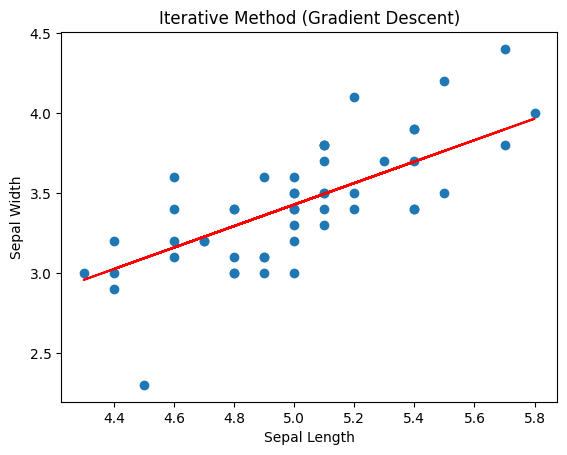

In [ ]:
iris = datasets.load_iris()
x = iris.data[:50, 0]
y = iris.data[:50, 1]

m = len(x)
w0 = 0
w1 = 0
alpha = 0.01
epochs = 2000

for i in range(epochs):
    y_pred = w0 + w1 * x
    error = y_pred - y

    dw0 = np.sum(error) / m
    dw1 = np.sum(error * x) / m

    w0 -= alpha * dw0
    w1 -= alpha * dw1

print("Intercept:", w0)
print("Slope:", w1)

# Final prediction
y_final = w0 + w1 * x

# MSE
mse = np.mean((y - y_final)**2)
print("MSE:", mse)

# R²
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - y_final)**2)
r2 = 1 - (ss_residual / ss_total)
print("R2:", r2)

# Graph
plt.scatter(x, y)
plt.plot(x, y_final, 'r')
plt.title("Iterative Method (Gradient Descent)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


<h1 style="color: red"><b>3. OUTPUT OF THE PRACTICAL</b></h1>
<hr>

<h3><b>✔ Numerical Output</b></h3>

<p>The following values are obtained after applying the three Linear Regression methods:</p>

<ul>
  <li><b>b (Bias / Intercept):</b> calculated using each method</li>
  <li><b>w (Weight / Slope):</b> calculated using each method</li>
  <li><b>MSE (Mean Squared Error):</b> measures how well the model fits the data</li>
  <li><b>R² (Coefficient of Determination):</b> indicates how much variance in Y is explained by X</li>
</ul>

<p><b>Output (Values may vary slightly):</b></p>

<pre>
b (intercept) : 0.06884743921526733
w (slope)     : 0.6716183669520489
MSE           : 0.06514345810654125
R² Score      : 0.5373859639065075
</pre>

<hr>

<h3><b>✔ Graphical Output</b></h3>

<p>
Three regression lines are plotted based on:
</p>

<ul>
  <li>Matrix Multiplication Method</li>
  <li>Covariance / Variance Method</li>
  <li>Gradient Descent Method</li>
</ul>

<p>
Each graph contains:
</p>

<ul>
  <li>A scatter plot of Sepal Length (X) vs Sepal Width (Y)</li>
  <li>A regression line based on the calculated values of <b>w</b> and <b>b</b></li>
</ul>

<p>
These graphs visually show how well each method fits the data.
</p>


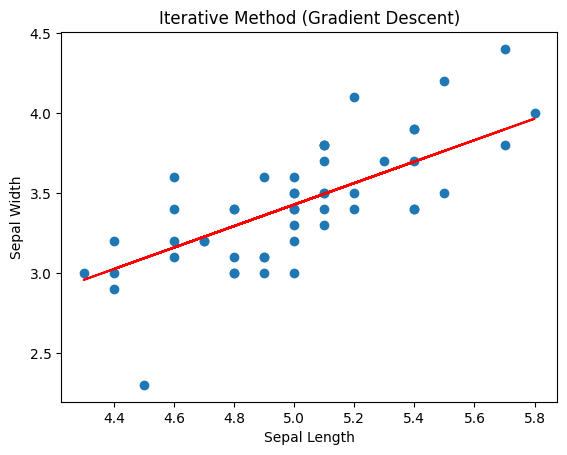

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_final, 'r')
plt.title("Iterative Method (Gradient Descent)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

<h1 style="color: red"><b>4. CONCLUSION OF THE PRACTICAL</b></h1>
<hr>

<p>
In this practical, we successfully implemented <b>Simple Linear Regression</b> using three different mathematical techniques:
</p>

<ul>
  <li><b>Matrix Multiplication Method (Normal Equation)</b></li>
  <li><b>Covariance / Variance Method</b></li>
  <li><b>Iterative Method (Gradient Descent)</b></li>
</ul>

<p>
All three approaches produced similar values of <b>w</b> (slope) and <b>b</b> (bias), demonstrating that different mathematical formulations lead to the same regression line when applied correctly.
</p>

<p>
The performance metrics — <b>MSE</b> and <b>R²</b> — indicate that:
</p>

<ul>
  <li>The regression model fits the data reasonably well.</li>
  <li>There is a positive linear relationship between Sepal Length (X) and Sepal Width (Y).</li>
  <li>R² shows that a significant portion of the variation in Y is explained by X.</li>
</ul>

<p>
Overall, this practical demonstrates a clear understanding of how linear regression works mathematically and how different methods can be used to compute model parameters. It also shows how to measure model accuracy and visualize results effectively.
</p>
